<h1 style="text-align: center;" markdown="1">TP2: Primer KNN completando el valor de algunas columnas y clasificacion</h1>
![](../data/icon_properati-data.png)

In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

# modules
import knn as knnlibrary

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import os
import glob

extension = 'csv'
os.chdir("../data")
results = [i for i in glob.glob('*.{}'.format(extension))]

# join de varios datasets
files = []
for idx, result in enumerate(results):
    file = pd.read_csv('../data/'+result, low_memory=False)
    files.append(file)
    if idx > 5: #solo tomo 3 archivos para no hacerlo tan pesado
        break

# la idea es contactenar varios dataframes y despues dropear las filas repetidas
properties = pd.concat(files).drop_duplicates()
properties.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,ecc59daba3d5bc726ae8aa9dbccfe79635aef175,2016-06-01,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.5888560251,-58.4087713338",...,130.0,NaN,3461.538462,5.0,4.0,NaN,http://www.properati.com.ar/ys05_venta_departa...,UNIDAD AL FRENTE CON BALCON CORRIDO Y 2 COCHER...,IMPECABLE PISO DE 4 AMB + DEP Y 2 COCHERAS,https://thumbs4.properati.com/2/RbSA4pJRsv2S8M...
1,7f1423f29df530cae38e7a59ddc6430c7da7ca38,2016-06-01,sell,apartment,Once,|Argentina|Capital Federal|Once|,Argentina,Capital Federal,3430291.0,"-34.6033997612,-58.3984088548",...,46.0,NaN,2065.217391,1.0,1.0,NaN,http://www.properati.com.ar/ys06_venta_departa...,SE VENDE A ESTRENAR EN PLENO CORAZON DE ONCE !...,Excelentes oficinas a estrenar!!!!!,https://thumbs4.properati.com/8/IMCZ4CqITeOqx5...
2,4fdd84d998a3f82f4a3b36f405cc3f7013fb642e,2016-06-01,sell,store,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.595849,-58.386979",...,0.0,NaN,NaN,NaN,NaN,500.0,http://www.properati.com.ar/ys0r_venta_local_b...,Local en Venta sobre Avenida Santa Fe.Ideal pa...,Local sobre Av. Santa Fe,https://thumbs4.properati.com/9/-VNE04tbyVFfcO...
3,a786b4d9a8f6cc86ba3e839f4cb85bbb03cf15fd,2016-06-01,sell,house,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,"-34.796679,-58.3993149",...,0.0,1285.714286,NaN,NaN,6.0,NaN,http://www.properati.com.ar/ys10_venta_casa_ad...,CHALET INMEJORABLE UBICACIÓN: PLANTA BAJA: AMP...,IMPORTANTE CHALET ZONA MUY RESIDENCIAL,https://thumbs4.properati.com/5/FhMeTqvYjAiHVS...
4,9844244d17eb024e0632a63b4098b67889de06bc,2016-06-01,sell,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,3429979.0,NaN,...,120.0,1250.000000,1250.000000,NaN,4.0,NaN,http://www.properati.com.ar/ys1c_venta_casa_pi...,"Casa muy funcional, desarrollada en una sola p...",BAYUGAR PROPIEDADES/ LINDISIMA CASA/ BARRIO CA...,https://thumbs4.properati.com/2/dxU45Z8wqh3Mdq...


# Limpieza del dataset

In [3]:
# una vez que tenemos los datos queremos solo los de capital y gba
properties_caba = properties[(properties['place_with_parent_names'].str.contains('Capital Federal') \
                             | properties['place_with_parent_names'].str.contains('Bs.As. G.B.A.'))]

def transform_date(props):
    props['created_on_year'] = pd.to_datetime(props['created_on']).apply(lambda x: x.year)
    props['created_on_month'] = pd.to_datetime(props['created_on']).apply(lambda x: x.month)
    props['created_on_day'] = pd.to_datetime(props['created_on']).apply(lambda x: x.day)
    return props

properties_caba = transform_date(properties_caba)

properties_caba.info()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 177153 entries, 0 to 37417
Data columns (total 30 columns):
id                            177153 non-null object
created_on                    177153 non-null object
operation                     177153 non-null object
property_type                 177153 non-null object
place_name                    177109 non-null object
place_with_parent_names       177153 non-null object
country_name                  177153 non-null object
state_name                    177153 non-null object
geonames_id                   140440 non-null float64
lat-lon                       122142 non-null object
lat                           122142 non-null float64
lon                           122142 non-null float64
price                         162972 non-null float64
currency                      159466 non-null object
price_aprox_local_currency    162972 non-null float64
price_aprox_usd               162972 non-null float64
surface_total_in_m2           127434

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
# queremos solo las propiedades que tienen precio y eliminamos columnas que sabemos que no son redundantes y que no nos servirian para knn
properties_caba.drop(['price_usd_per_m2','price_per_m2','price_aprox_usd','price_aprox_local_currency',\
                      'id','operation','country_name','properati_url','image_thumbnail','description','title',\
                      'currency','lat-lon','geonames_id','created_on'], axis = 1, inplace = True)
properties_caba = properties_caba[properties_caba['price'].notnull() & properties_caba['place_name'].notnull()]
# eliminamos propiedades con mas de 54 pisos
properties_caba = properties_caba[properties_caba['floor']<=54]
properties_caba.info()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17338 entries, 0 to 37417
Data columns (total 15 columns):
property_type              17338 non-null object
place_name                 17338 non-null object
place_with_parent_names    17338 non-null object
state_name                 17338 non-null object
lat                        12868 non-null float64
lon                        12868 non-null float64
price                      17338 non-null float64
surface_total_in_m2        11140 non-null float64
surface_covered_in_m2      16429 non-null float64
floor                      17338 non-null float64
rooms                      10383 non-null float64
expenses                   3411 non-null float64
created_on_year            17338 non-null int64
created_on_month           17338 non-null int64
created_on_day             17338 non-null int64
dtypes: float64(8), int64(3), object(4)
memory usage: 2.1+ MB


In [5]:
from sklearn.preprocessing import LabelEncoder

def encoder_attributes(data, encoder):
    data['place_name'] = encoder.fit_transform(data[['place_name']])
    data['state_name'] = encoder.fit_transform(data[['state_name']])
    data['place_with_parent_names'] = encoder.fit_transform(data[['place_with_parent_names']])
    data['property_type'] = encoder.fit_transform(data[['property_type']])
    return data

# atributos categoricos
encoder = LabelEncoder()
properties_caba = encoder_attributes(properties_caba, encoder)

properties_caba.head()

/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,created_on_year,created_on_month,created_on_day
0,1,115,188,3,-34.588856,-58.408771,450000.0,NaN,130.0,5.0,4.0,NaN,2016,6,1
1,1,113,187,3,-34.603400,-58.398409,95000.0,NaN,46.0,1.0,1.0,NaN,2016,6,1
385,1,139,203,3,-34.544033,-58.472911,135000.0,74.0,74.0,2.0,3.0,NaN,2016,6,2
433,1,112,79,0,-34.508148,-58.479280,298000.0,NaN,54.0,15.0,2.0,NaN,2016,6,2
572,1,21,169,3,-34.559071,-58.446733,110000.0,NaN,40.0,4.0,1.0,NaN,2016,6,4


In [6]:
# limpiamos un poco el dataset
from sklearn.preprocessing import Imputer

imputer_most_frequent = Imputer(missing_values='NaN', strategy='mean', axis=0)
#properties_caba["floor"] = imputer_most_frequent.fit_transform(properties_caba[["floor"]])
#properties_caba["rooms"] = imputer_most_frequent.fit_transform(properties_caba[["rooms"]])
properties_caba['floor'] = properties_caba[['floor']].fillna(1)
properties_caba['rooms'] = properties_caba[['rooms']].fillna(1)

imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)
properties_caba["lat"] = imputer_mean.fit_transform(properties_caba[["lat"]])
properties_caba["lon"] = imputer_mean.fit_transform(properties_caba[["lon"]])
properties_caba["surface_total_in_m2"] = imputer_mean.fit_transform(properties_caba[["surface_total_in_m2"]])
properties_caba["surface_covered_in_m2"] = imputer_mean.fit_transform(properties_caba[["surface_covered_in_m2"]])
#properties_caba["price_usd_per_m2"] = imputer_mean.fit_transform(properties_caba[["price_usd_per_m2"]])
#properties_caba["price_per_m2"] = imputer_mean.fit_transform(properties_caba[["price_per_m2"]])

# si las expensas son NaN entonces las reemplazo por 0
properties_caba['expenses'] = properties_caba[['expenses']].fillna(0.0)

properties_caba.head()

,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,created_on_year,created_on_month,created_on_day
0,1,115,188,3,-34.588856,-58.408771,450000.0,77.589587,130.0,5.0,4.0,0.0,2016,6,1
1,1,113,187,3,-34.603400,-58.398409,95000.0,77.589587,46.0,1.0,1.0,0.0,2016,6,1
385,1,139,203,3,-34.544033,-58.472911,135000.0,74.000000,74.0,2.0,3.0,0.0,2016,6,2
433,1,112,79,0,-34.508148,-58.479280,298000.0,77.589587,54.0,15.0,2.0,0.0,2016,6,2
572,1,21,169,3,-34.559071,-58.446733,110000.0,77.589587,40.0,4.0,1.0,0.0,2016,6,4


# Separacion del set de train para Cross-validation, Normalizacion y feature selection

In [7]:
# que queremos predecir?
properties_caba.iloc[:, 1:]

,place_name,place_with_parent_names,state_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,created_on_year,created_on_month,created_on_day
0,115,188,3,-34.588856,-58.408771,450000.0,77.589587,130.000000,5.0,4.0,0.0,2016,6,1
1,113,187,3,-34.603400,-58.398409,95000.0,77.589587,46.000000,1.0,1.0,0.0,2016,6,1
385,139,203,3,-34.544033,-58.472911,135000.0,74.000000,74.000000,2.0,3.0,0.0,2016,6,2
433,112,79,0,-34.508148,-58.479280,298000.0,77.589587,54.000000,15.0,2.0,0.0,2016,6,2
572,21,169,3,-34.559071,-58.446733,110000.0,77.589587,40.000000,4.0,1.0,0.0,2016,6,4
763,134,201,3,-34.588987,-58.407955,148000.0,77.589587,75.000000,1.0,3.0,0.0,2016,6,7
780,153,9,0,-34.315935,-58.789610,179000.0,77.589587,20.000000,9.0,1.0,0.0,2016,6,7
890,106,103,1,-34.648915,-58.796383,48000.0,32.000000,32.000000,2.0,2.0,900.0,2016,6,9
1008,33,172,3,-34.586044,-58.470892,280000.0,114.000000,105.000000,6.0,1.0,5000.0,2016,6,10
1010,39,173,3,-34.599574,-58.378334,129000.0,43.000000,43.000000,10.0,3.0,3000.0,2016,6,10


In [8]:
from sklearn.model_selection import train_test_split

now = datetime.datetime.now()

# separamos el train de traing para validarlo luego usando un 30% de los datos
X, y = properties_caba.iloc[:, properties_caba.columns != 'price'].values, properties_caba.iloc[:, properties_caba.columns == 'price'].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.4, random_state=now.microsecond)
    
len(X_test), len(X_train)

(3468, 13870)

In [9]:
# a cada dato le restamos la media y lo dividimos por su desviacion standard
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# en la documentacion de sklearn menciona sobre la regularizacion pero la voy a escapear por ahora
from sklearn.linear_model import LogisticRegression

LogisticRegression(penalty='l1')

logi_regr = LogisticRegression(penalty='l1', C=0.1)
logi_regr.fit(X_train_std, y_train)
print('Training accuracy:', logi_regr.score(X_train_std, y_train))
print('Test accuracy:', logi_regr.score(X_test_std, y_test))

/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy: 0.0339581831291
Test accuracy: 0.0311418685121


# Seleccion de parametros con Backward Selection

In [10]:
from sklearn.base import clone
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, median_absolute_error

# clase para hacer Backward Selection
class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
        random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
        X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
        
    def _calc_score(self, X_train, y_train,
                        X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

# aplicamos algoritmos -> v0.2
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
sbs = SBS(knn, k_features=1, scoring=median_absolute_error)
sbs.fit(X_train_std, y_train)


In [11]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13),
 (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13),
 (0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13),
 (0, 1, 2, 3, 4, 5, 8, 10, 11, 12, 13),
 (0, 1, 2, 3, 4, 5, 8, 11, 12, 13),
 (0, 2, 3, 4, 5, 8, 11, 12, 13),
 (0, 3, 4, 5, 8, 11, 12, 13),
 (0, 4, 5, 8, 11, 12, 13),
 (0, 4, 5, 8, 11, 13),
 (0, 4, 8, 11, 13),
 (0, 8, 11, 13),
 (0, 11, 13),
 (11, 13),
 (13,)]

In [12]:
sbs.scores_

[32534.624851320186,
 35588.539678740293,
 41701.066327608605,
 46787.603188438567,
 50595.639073768514,
 54514.944555258269,
 55979.941489612575,
 59606.743733776224,
 61852.473725586016,
 61904.497480995749,
 78042.200000000012,
 78550.0,
 85409.5,
 79782.600000000006]

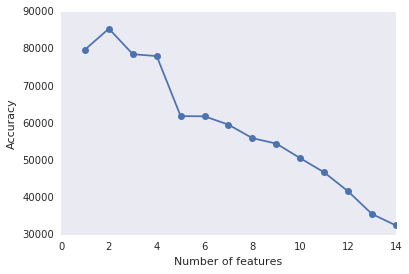

In [13]:
# graficamos
k_feat = [len(k) for k in sbs.subsets_]
plot(k_feat, sbs.scores_, marker='o')
#ylim([0.0, 1.1])
ylabel('Accuracy')
xlabel('Number of features')
grid()
show()

In [14]:
# hacemos una prueba en el set original
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.996852130077
Test accuracy: 0.360306100751


In [ ]:
k_param = list(sbs.subsets_[0])
print(properties_caba.iloc[:, properties_caba.columns != 'price'].columns[k_param])

# y como clasifica tomando solo los features devueltos
knn.fit(X_train_std[:, k_param], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k_param], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k_param], y_test))

La peor clasficion del mundo

# Agregado de la version v0.2

In [ ]:
k_scores = []
k_list = []
p_list = []
labels = []

best_score = 0
best_k = 0
best_p = 0

for i in range(2,10):
    for p in np.random.randint(2,10,size=2):
        knn = KNeighborsRegressor(n_neighbors=i, weights='distance', p=p)
        knn.fit(X_train_std[:, k_param], y_train)

        p_list.append(p)
        k_list.append(i)
        
        sc = knn.score(X_test_std[:, k_param], y_test)
        
        labels.append(str(round(sc,3)))
        k_scores.append(sc)
        
        if(sc > best_score):
            best_score = sc
            best_k = i
            best_p = p

mu = np.mean(k_scores)
v = np.var(k_scores)

k_scores = list(map(lambda x: ((x-mu)/v)*50, k_scores))

# graficamos
fig, ax = plt.subplots()
ax.scatter(k_list, p_list, s=k_scores, alpha=0.5)

title = "K vs Distancia - best k=%s, best p=%s, score=%s"%(best_k, best_p, best_score)
plt.title(title)
ylabel('Distance')
xlabel('k values')

for i, label in enumerate(labels):
    ax.annotate(label, (k_list[i],p_list[i]))

ax.grid(linestyle='-', linewidth='0.5', color='red')

#plt.savefig('/home/jovyan/work/TP/TP2/img/best_k=%s-best_p=%s-score=%s.png'%(best_k, best_p, best_score));

# Random Forest para obtener la importancia de los features

In [17]:
from sklearn.ensemble import RandomForestClassifier

properties_caba.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'lat', 'lon', 'price', 'surface_total_in_m2', 'surface_covered_in_m2',
       'floor', 'rooms', 'expenses', 'created_on_year', 'created_on_month',
       'created_on_day'],
      dtype='object')

In [18]:
# 100 RF para ver la importancia de los feature
#feat_labels = properties_caba.columns[properties_caba.columns.values != 'price']
#forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
#forest.fit(X_train, y_train)
#importances = forest.feature_importances_
#indices = np.argsort(importances)[::-1]
#for f in range(X_train.shape[1]):
#    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f],importances[indices[f]]))